In [94]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import math

In [5]:
df = sns.load_dataset('tips')

In [7]:
df.head(20)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [40]:
print(np.mean(df['total_bill']))
print(np.median(df['total_bill']))
print(np.std(df['total_bill']))
print(np.max(df['total_bill']))
print(np.min(df['total_bill']))
print(np.percentile(df['total_bill'],(25,75)))

19.78594262295082
17.795
8.884150577771132
50.81
3.07
[13.3475 24.1275]


In [41]:
print(np.mean(df['tip']))
print(np.median(df['tip']))
print(np.std(df['tip']))
print(np.max(df['tip']))
print(np.min(df['tip']))
print(np.percentile(df['tip'],(25,75)))

2.99827868852459
2.9
1.3807999538298954
10.0
1.0
[2.     3.5625]


In [42]:
print(np.mean(df['size']))
print(np.median(df['size']))
print(np.std(df['size']))
print(np.max(df['size']))
print(np.min(df['size']))
print(np.percentile(df['size'],(25,75)))

2.569672131147541
2.0
0.9491488287193913
6
1
[2. 3.]


In [44]:
import statistics

print(statistics.mode(df['sex']))
print(statistics.mode(df['smoker']))
print(statistics.mode(df['day']))
print(statistics.mode(df['time']))

Male
No
Sat
Dinner


<Axes: ylabel='tip'>

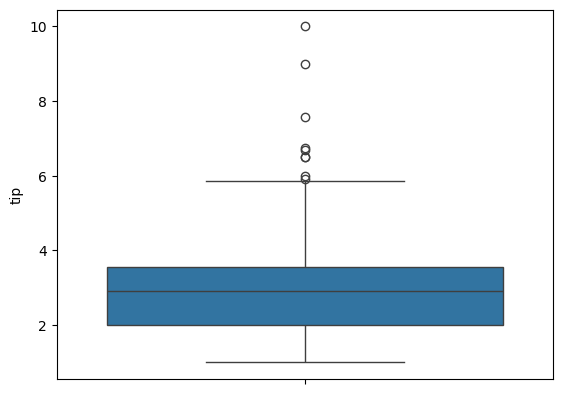

In [51]:
sns.boxplot(df['tip'])

<Axes: xlabel='total_bill', ylabel='Count'>

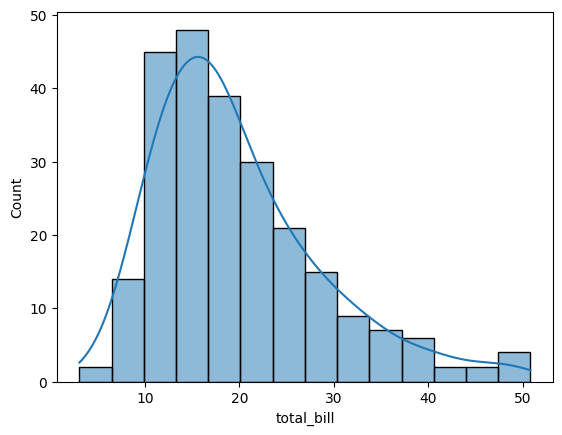

In [50]:
sns.histplot(df['total_bill'],kde=True)

<Axes: xlabel='count', ylabel='day'>

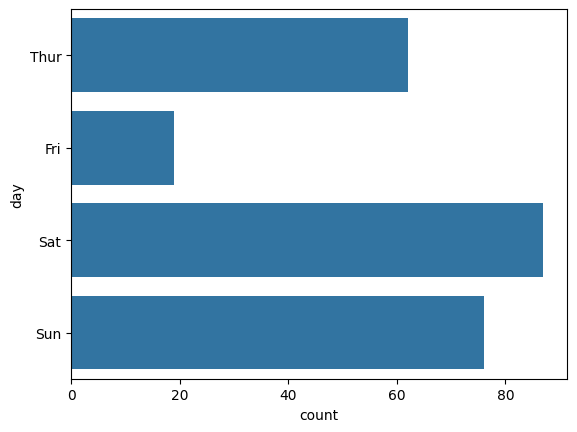

In [45]:
sns.countplot(df['day'])

<Axes: xlabel='count', ylabel='time'>

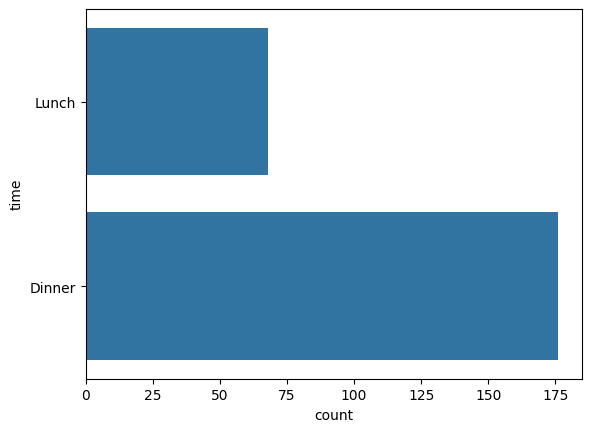

In [46]:
sns.countplot(df['time'])

<Axes: xlabel='count', ylabel='sex'>

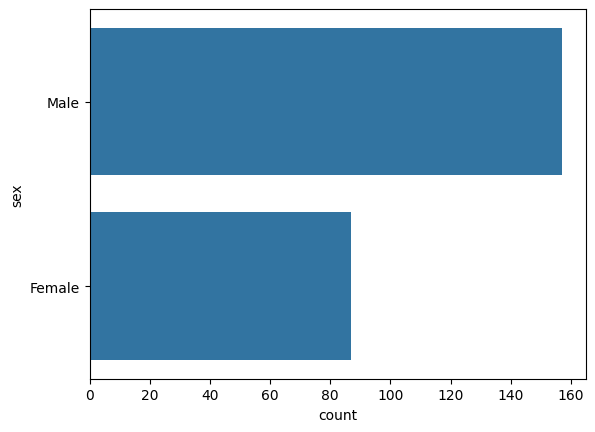

In [47]:
sns.countplot(df['sex'])


<Axes: ylabel='Count'>

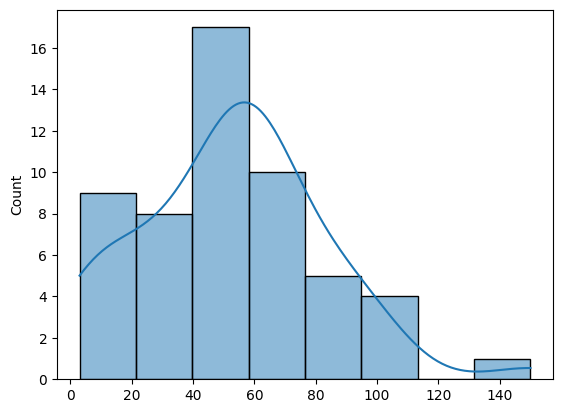

In [86]:
outliers=[]
dataset=[35,73,20,58,32,57,35,32,56,96,55,83,52,54,83,25,48,63,46,58,150,106,10,56,56,45,62,4,54,9,4,69,3,12,34,56,78,90,87,65,43,23,45,7,26,52,62,68,68,76,98,68,96,6]

sns.histplot(dataset,kde=True)

In [87]:
def detect_outliers(dataset):
    threshold=3
    mean=np.mean(dataset)
    std=np.std(dataset)
    for i in dataset:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers
detect_outliers(dataset)

[150]

<Axes: ylabel='Count'>

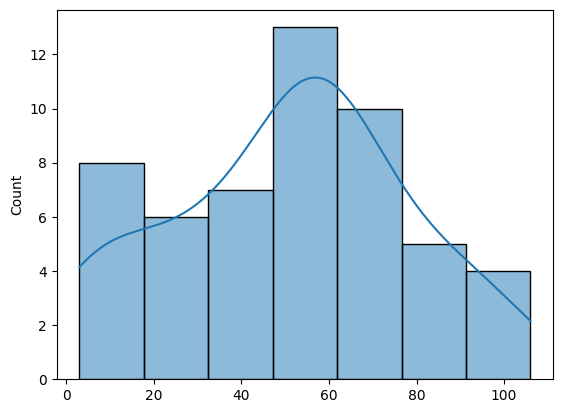

In [90]:
dataset2=[]
for i in dataset:
    if i in outliers:
        pass
    else:
        dataset2.append(i)
sns.histplot(dataset2,kde=True)

In [102]:
dataset=sorted(dataset)
q1,q3=np.percentile(dataset,(25,75))
iqr=q3-q1
lf=q1-(1.5*iqr)
uf=q3+(1.5*iqr)
print(q1,q3,lf,uf)

32.5 68.0 -20.75 121.25


In [104]:
outliers2=[]
for i in dataset:
    if i < lf or i > uf:
        outliers2.append(i)
outliers2

[150]

<Axes: ylabel='Count'>

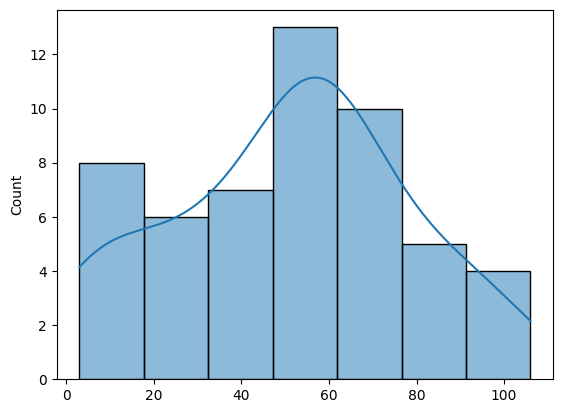

In [105]:
dataset3=[]
for i in dataset:
    if i in outliers2:
        pass
    else:
        dataset3.append(i)
sns.histplot(dataset3,kde=True)

<Axes: >

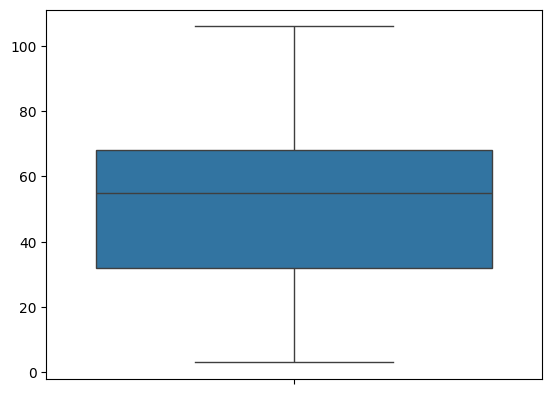

In [107]:
sns.boxplot(dataset3)

* ## **p-Value & Significance Level (α)**

Real-life scenario:
* A gym trainer claims that a new workout program increases average weight loss beyond 2 kg/month.
* Null hypothesis (H₀): Mean weight loss = 2 kg
* Alternative hypothesis (H₁): Mean weight loss > 2 kg
* Significance level (α): 0.05

In [128]:
weight_loss = np.array([2.5, 3.0, 2.8, 3.2, 2.9, 3.1, 2.7])
t_stat, p_value = stats.ttest_1samp(weight_loss, popmean=2)

# since it is two tailed by default so we need one tail because it says > 2kg
p_value_onetailed = p_value/2
print("t-statistic:", t_stat)
print("p-value:", p_value_onetailed)

alpha = 0.05
if t_stat > 0 and p_value_onetailed < alpha:
    print("Reject H0 → Workout program is effective")
else:
    print("Fail to reject H0")

t-statistic: 9.722375746901287
p-value: 3.399581150341618e-05
Reject H0 → Workout program is effective


## **Hypothesis Testing (General Structure)**

Real-life scenario:
A college claims average student score is 75.

In [131]:
score =np.array([72,78, 74, 76, 79, 77, 73,78,79,80,71,74,60])
t_test,p_value = stats.ttest_1samp(score,75)
print("t-statistic:", t_test)
print("p-value:", p_value)
alpha = 0.05

if p_value < alpha:
    print("Reject H₀")
else:
    print("Fail to reject H₀")

t-statistic: -0.21004201260420072
p-value: 0.8371588562508205
Fail to reject H₀


## **One-Sample Z-Test**

Real-life scenario:
1. A mobile company claims average battery life is 10 hours.
2. Population standard deviation is known (σ = 1.5).

Used when:
*   Population σ known
*   Large sample


In [136]:
sample=np.array([9.5, 10.2, 10.1, 9.8, 10.3, 10.4, 9.4, 10.6, 10.9, 11.0, 8.9, 9.7, 10.7, 10.5, 10.8, 9.9, 9.8,11.0,11.3,10.2,10.0])
sample_mean= np.mean(sample)
population_mean=10
psd=1.5
n=len(sample)
z = (sample_mean - population_mean) / (psd/math.sqrt(n))
p_value = 1-stats.norm.cdf(z)
print("p-value:", p_value)
alpha = 0.05

if p_value < alpha:
    print("Reject H₀ → Mean battery life > 10 hours")
else:
    print("Fail to reject H₀")


p-value: 0.23349263067339288
Fail to reject H₀


## **One-Sample T-Test (Most Common in DS)**

Real-life scenario:
An e-learning platform claims students study 5 hrs/day.

Used when:
*  Population σ unknown
*  Small sample size

In [134]:
study_hours = np.array([4.5, 5.2, 4.8, 5.1, 4.9])
t_test,p_value = stats.ttest_1samp(study_hours,popmean=5)
print("t-statistic:", t_test)
print("p-value:", p_value)
if p_value < 0.05 :
    print("reject H0.")
else:
    print("Fail to reject H₀")

t-statistic: -0.8164965809277231
p-value: 0.46005075284396274
Fail to reject H₀


## **Chi-Square Test (Categorical Data)**

Real-life scenario:
Is gender independent of course selection?

 Used for:
* Independence
* Association between categories

In [120]:
import pandas as pd

data = pd.DataFrame({
    'DataScience': [30, 20],
    'WebDev': [25, 35]
}, index=['Male', 'Female'])

chi2, p, dof, expected = stats.chi2_contingency(data)

print("Chi-square:", chi2)
print("p-value:", p)

if p < 0.05:
    print("Dependent variables")
else:
    print("Independent variables")


Chi-square: 2.9699999999999998
p-value: 0.08482185440586089
Independent variables


## **Covariance (Relationship Direction)**

Real-life scenario:
* Relationship between study hours and marks.
* Positive → move together
* Negative → move opposite

### **1) Pearson Correlation (Linear Relationship)**

Real-life scenario:
* Does exercise time affect calorie burn?
* Range –1 to +1
* Assumes linear & normal data

### **2) Spearman Correlation (Rank-Based)**

Real-life scenario:
* Relationship between student rank and placement package.
* Works with non-linear
* Uses rank instead of values

In [121]:
study_hours = np.array([2, 4, 6, 8])
marks = np.array([50, 65, 80, 90])

cov = np.cov(study_hours, marks)[0][1]
print("Covariance:", cov)


Covariance: 45.0


In [122]:
exercise = np.array([30, 45, 60, 75])
calories = np.array([200, 300, 420, 520])

corr, p_value = stats.pearsonr(exercise, calories)

print("Pearson Correlation:", corr)
print("p-value:", p_value)


Pearson Correlation: 0.9993148337667671
p-value: 0.0006851662332327813


In [123]:
rank = np.array([1, 2, 3, 4, 5])
package = np.array([15, 14, 13, 12, 10])

corr, p_value = stats.spearmanr(rank, package)

print("Spearman Correlation:", corr)
print("p-value:", p_value)


Spearman Correlation: -0.9999999999999999
p-value: 1.4042654220543672e-24
